<a href="https://colab.research.google.com/github/unverciftci/to_Uniform/blob/main/toUniformSR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
import random
import numpy as np
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras import regularizers
import matplotlib.pyplot as plt
%matplotlib inline
random.seed(0)
np.random.seed(0)
tf.random.set_seed(0)

In [25]:
from sklearn import datasets

X, color = datasets.make_swiss_roll(n_samples=200, random_state=0)

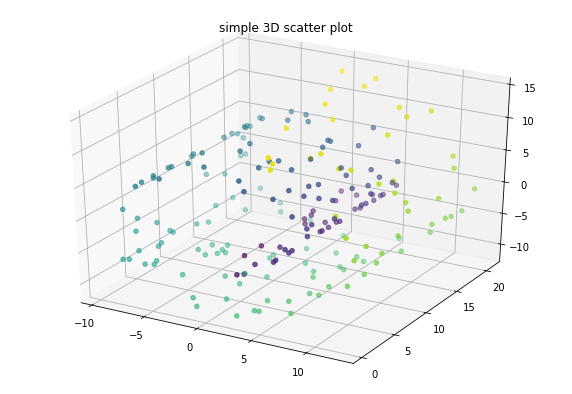

In [26]:
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
 
# Creating plot
ax.scatter3D(X[:,0], X[:,1], X[:,2], c = color)
plt.title("simple 3D scatter plot")
 
# show plot
plt.show()

In [27]:
X = (X - X.min()) / (X.max()-X.min())

In [36]:
tf.random.set_seed(0)

inputs = keras.Input((3,))
x = keras.layers.Dense(
    units=4,
    activation='sigmoid'
)(inputs)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Dense(
    units=4,
    activation='sigmoid'
)(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Dense(units=2,
    activation='sigmoid')(x)
outputs = keras.layers.BatchNormalization()(x)
model = keras.Model(inputs=inputs, outputs=outputs)

In [37]:
tf.random.set_seed(0)

def m_loss(a, b):
  return -keras.losses.MSE(a, b)

model.compile(loss=m_loss)

In [38]:
tf.random.set_seed(0)

for i in range(50):
   np.random.seed(i)
   X_ = X + np.random.normal(loc=0., scale=0.00001, size=(200, 3))
   Y_ = model(X_)
   model.fit(X, Y_, verbose=0)

In [39]:

Y = model.predict(X)

7/7 [==============================] - 0s 3ms/step


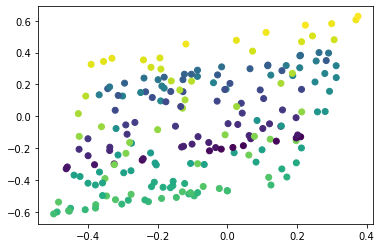

In [40]:
plt.scatter(Y[:,0], Y[:,1], c=color)
plt.show()